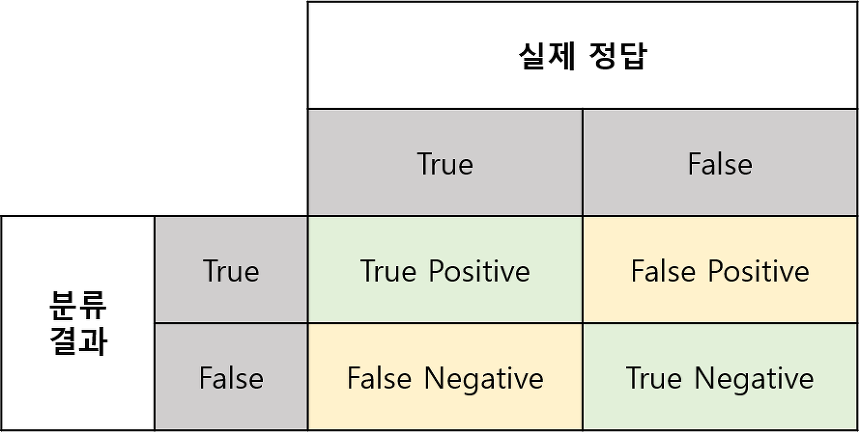

In [1]:
from PIL import Image
Image.open('images/confusion_matrix.png')

# Recall : 실제 참인 데이터중 참으로 예측한 데이터의 비율

# Precision : 참으로 예측한 데이터중 실제로 참인 데이터의 비율

# fallout : 실제 거짓인 데이터들중 거짓이라고 예측한 데이터의 비율

# Precision = TP/(TP + FP)

# Recall = TP/(TP + FN)

# fallout = FP/(FP + TN)

# Accuracy = (TP + TN)/(TP + FP + FN + TN)

# F_beta = (1 + beta^2)(precision * recall)/(beta^2*precision + recall)

# F_1 = (F_beta|beta == 1) = 2 * precision * recall/(precision + recall)

In [2]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y = [0,0,0,0,1,1,1,1,0,0]
y_pred = [1,0,0,1,0,1,1,1,0,0]

print(classification_report(y,y_pred,target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.80      0.67      0.73         6
     class 1       0.60      0.75      0.67         4

    accuracy                           0.70        10
   macro avg       0.70      0.71      0.70        10
weighted avg       0.72      0.70      0.70        10



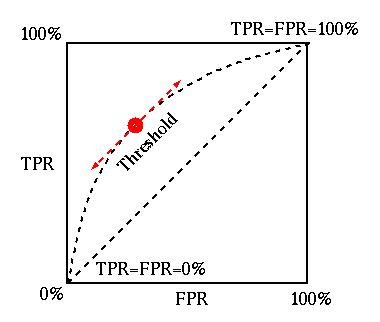

In [3]:
Image.open('images/roc_curve.png')

In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

X, y = make_classification(n_samples = 32, n_features = 2, n_informative = 2, n_redundant=0, random_state = 20200714)

In [5]:
model = LogisticRegression()
model = model.fit(X, y)
y_pred = model.predict(X)
f_value = model.decision_function(X)

In [6]:
df = pd.DataFrame(np.vstack([f_value, y_pred, y]).T, columns=["f", "y_pred", "y"])
df.sort_values("f", ascending=False).reset_index(drop=True)

,f,y_pred,y
0,4.602221,1.0,1.0
1,3.305640,1.0,1.0
2,3.152712,1.0,1.0
3,2.572651,1.0,1.0
4,2.124420,1.0,1.0
5,1.898859,1.0,1.0
6,1.589315,1.0,1.0
7,1.528891,1.0,1.0
8,1.382807,1.0,1.0
9,1.347247,1.0,0.0


In [7]:
confusion_matrix(y,y_pred,labels = [1,0])

array([[12,  4],
       [ 2, 14]], dtype=int64)

# In this confusion matrix,

# recall = 12/(12+4)

# precision = 12/(12+2)

# fallout = 2/(2+14)

In [8]:
fallout = 2/16
recall = 12/16

In [9]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, model.decision_function(X))
fpr, tpr, thresholds

(array([0.    , 0.    , 0.    , 0.0625, 0.0625, 0.125 , 0.125 , 0.25  ,
        0.25  , 0.625 , 0.625 , 1.    ]),
 array([0.    , 0.0625, 0.5625, 0.5625, 0.75  , 0.75  , 0.875 , 0.875 ,
        0.9375, 0.9375, 1.    , 1.    ]),
 array([ 5.60222128,  4.60222128,  1.38280684,  1.34724682,  0.26574754,
         0.18759206, -0.10917614, -0.25869973, -0.41184475, -1.18100782,
        -1.36565632, -3.66810048]))

In [10]:
fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:, 1])
fpr, tpr, thresholds

(array([0.    , 0.    , 0.    , 0.0625, 0.0625, 0.125 , 0.125 , 0.25  ,
        0.25  , 0.625 , 0.625 , 1.    ]),
 array([0.    , 0.0625, 0.5625, 0.5625, 0.75  , 0.75  , 0.875 , 0.875 ,
        0.9375, 0.9375, 1.    , 1.    ]),
 array([1.99007006, 0.99007006, 0.79944141, 0.79367915, 0.56604864,
        0.54676097, 0.47273304, 0.43568337, 0.39846987, 0.23487104,
        0.20332254, 0.0248896 ]))

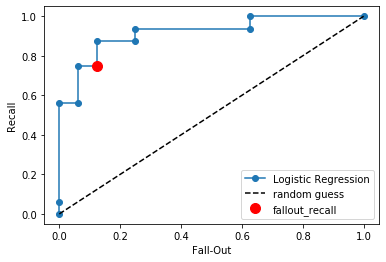

In [11]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'o-', label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.plot(fallout, recall, 'ro', ms=10, label = "fallout_recall")
plt.legend()
plt.xlabel('Fall-Out')
plt.ylabel('Recall')
plt.show()

In [12]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.91796875

# Logistic Regression VS SVM

In [13]:
from sklearn.svm import SVC

X, y = make_classification(n_samples=1000, weights=[0.95, 0.05], random_state=5)

LR = LogisticRegression().fit(X, y)
y_pred1 = LR.predict(X)

SVM = SVC(gamma=0.0001, C=3000, probability=True).fit(X, y)
y_pred2 = SVM.predict(X)

In [14]:
confusion_matrix(y,y_pred1)

array([[940,   3],
       [ 30,  27]], dtype=int64)

In [15]:
confusion_matrix(y,y_pred2)

array([[940,   3],
       [ 30,  27]], dtype=int64)

In [16]:
print(classification_report(y, LR.predict(X)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       943
           1       0.90      0.47      0.62        57

    accuracy                           0.97      1000
   macro avg       0.93      0.74      0.80      1000
weighted avg       0.97      0.97      0.96      1000



In [17]:
print(classification_report(y, SVM.predict(X)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       943
           1       0.90      0.47      0.62        57

    accuracy                           0.97      1000
   macro avg       0.93      0.74      0.80      1000
weighted avg       0.97      0.97      0.96      1000



The two models have same scores

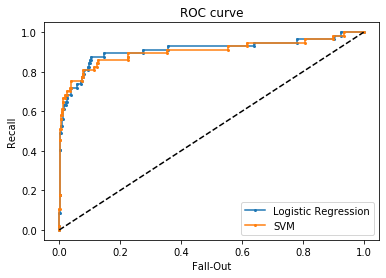

In [18]:
fpr1, tpr1, thresholds1 = roc_curve(y, LR.decision_function(X))
fpr2, tpr2, thresholds2 = roc_curve(y, SVM.decision_function(X))

plt.plot(fpr1, tpr1, 'o-', ms=2, label="Logistic Regression")
plt.plot(fpr2, tpr2, 'o-', ms=2, label="SVM")
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('Fall-Out')
plt.ylabel('Recall')
plt.title('ROC curve')
plt.show()

In [19]:
auc(fpr1, tpr1), auc(fpr2, tpr2)

(0.9112202563673234, 0.9037227214377407)

# Multi-Class classification

# --> One VS Rest

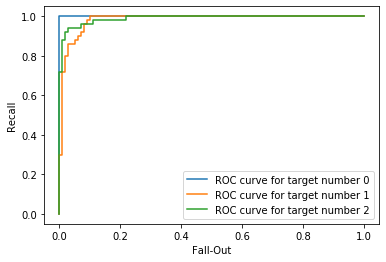

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize

iris = load_iris()
X = iris.data
y = label_binarize(iris.target, [0, 1, 2])

fpr = [None] * 3
tpr = [None] * 3
thr = [None] * 3

for i in range(3):
    model = GaussianNB().fit(X, y[:, i])
    fpr[i], tpr[i], thr[i] = roc_curve(y[:, i], model.predict_proba(X)[:, 1])
    plt.plot(fpr[i], tpr[i], label = 'ROC curve for target number {}'.format(i))

plt.legend()
plt.xlabel('Fall-Out')
plt.ylabel('Recall')
plt.show()